<a href="https://colab.research.google.com/github/PlugInRichi/99Ways-to-Build-a-Model/blob/master/tree/master/ExploratoryDataAnalysis/Housing-DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import os
import tarfile
from six.moves import urllib

import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
/content/drive/MyDrive/HandsOnMachineLearning

In [20]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("/content/drive/MyDrive/HandsOnMachineLearning/datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 if not os.path.isdir(housing_path):
  os.makedirs(housing_path)

fetch_housing_data() #Create directory tree

#Path to save file
tgz_path = os.path.join(HOUSING_PATH, "housing.tgz")
#Saving File
urllib.request.urlretrieve(HOUSING_URL, tgz_path)

#Unzip tgz file 
housing_tgz = tarfile.open(tgz_path)
housing_tgz.extractall(path=HOUSING_PATH)
housing_tgz.close()

In [21]:
def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [22]:
housing = load_housing_data()

# Data Exploration Analysys

In [23]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## There are missing values for total_bedrooms column 

We can get information about the types and 

In [25]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [27]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Show a summary of numerical atrubutes
Percentil: indicates the value below witch a given percentage of observations falls

In [26]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## We need to understand how the data was computed

### Median_income
For example the income is expreced like tens of thousands of dollars

The data was capped at 15 for higher median incomes and 0.05 for lower median incomes

### Median_house_value and Housing_median_age
Were also capped (we can see en in gistogram there is a anormal number of instances with the same value)

In this case we need to remove those districts from the training set for that the ssystem canot evaluate poorly in values beyond 500 000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17ee664b90>,
      dtype=object)

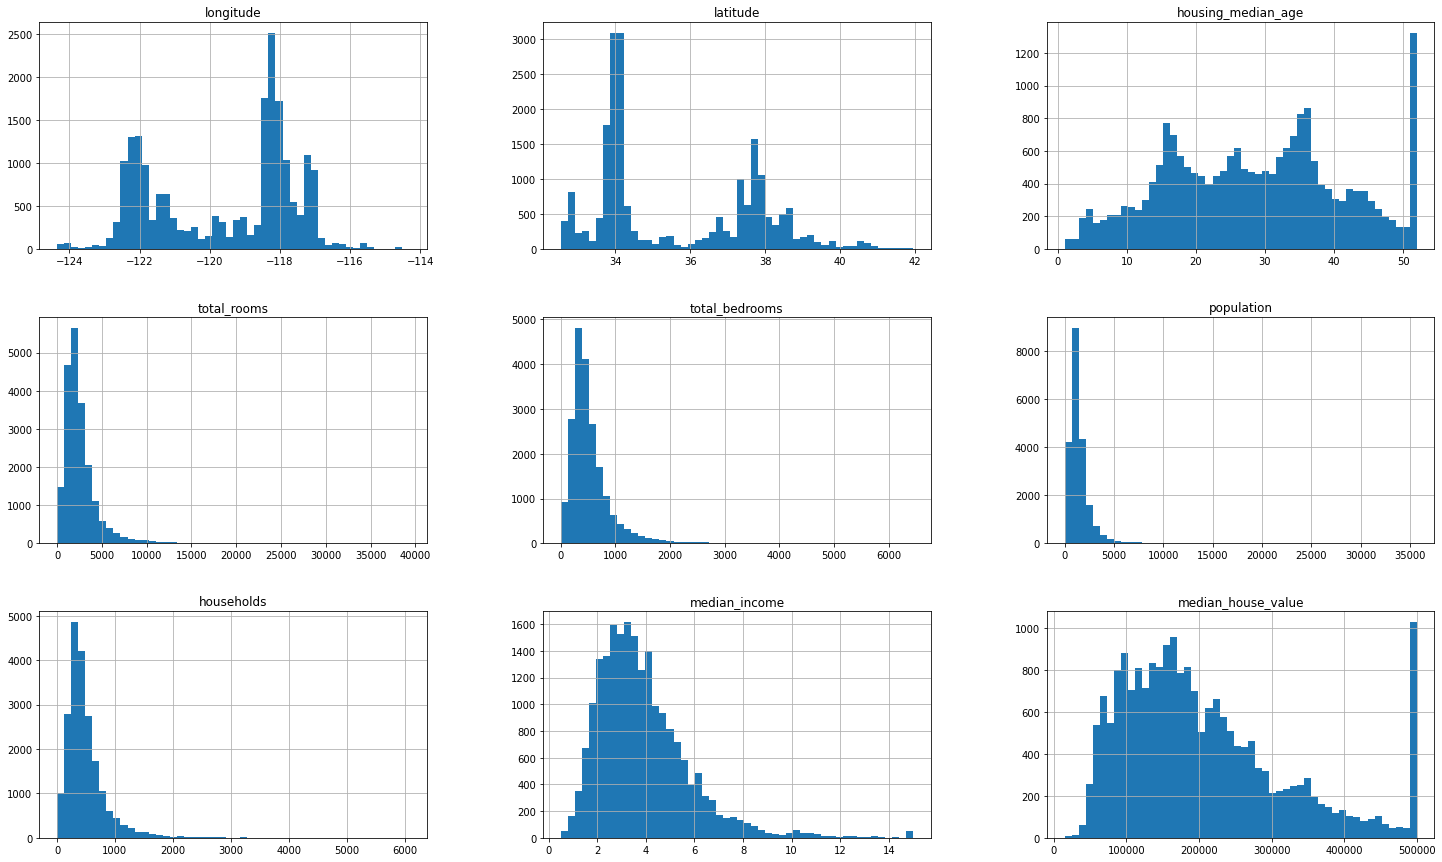

In [30]:
housing.hist(bins=50, figsize=(30,15))

Many histograms ara tail heavy: thay extend much farther to the right of the median than to the leaft. This makes a bit harder for some Machine Learning algorithms to detect patterns.

We will try transform these atributes later in to have more bell-shaped distributions

# **Split the data**

Selection random data is fine if your dataset is large enough, but is not we have the risk to introduces a significant bias

We need to create a equally distributed data sample if we want a train split data representative 

In [36]:
train_data, test_data = train_test_split(housing, test_size=0.2)

In [40]:
print("Number of intances for training {}".format(len(train_data)))
print("Number of intances for test {}".format(len(test_data)))

Number of intances for training 16512
Number of intances for test 4128
